In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
games_df = pd.read_csv('games.csv')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [3]:
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

In [4]:
games_df = reduce_memory(pd.read_csv('games.csv'))
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int32  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int32  
 8   user_reviews    50872 non-null  int32  
 9   price_final     50872 non-null  float32
 10  price_original  50872 non-null  float32
 11  discount        50872 non-null  float32
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float32(3), int32(3), object(3)
memory usage: 2.5+ MB


In [5]:
recommendation_df = reduce_memory(pd.read_csv('recommendations.csv'))
recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int32  
 1   helpful         int32  
 2   funny           int32  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float32
 6   user_id         int32  
 7   review_id       int32  
dtypes: bool(1), float32(1), int32(5), object(1)
memory usage: 1.3+ GB


In [6]:
user_df = reduce_memory(pd.read_csv('users.csv'))
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   products  int32
 2   reviews   int32
dtypes: int32(3)
memory usage: 163.7 MB


In [7]:
metadata_df = pd.read_json('games_metadata.json', lines=True)
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [9]:
recommendation_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.299999,51580,0
1,304390,4,0,2017-02-17,False,11.500000,2586,1
2,1085660,2,0,2019-11-17,True,336.500000,253880,2
3,703080,0,0,2022-09-23,True,27.400000,259432,3
4,526870,0,0,2021-01-10,True,7.900000,23869,4


In [10]:
user_df.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [11]:
metadata_df.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [12]:
games_df['date_release'] = pd.to_datetime(games_df['date_release'])
games_df['release_year'] = games_df['date_release'].dt.year

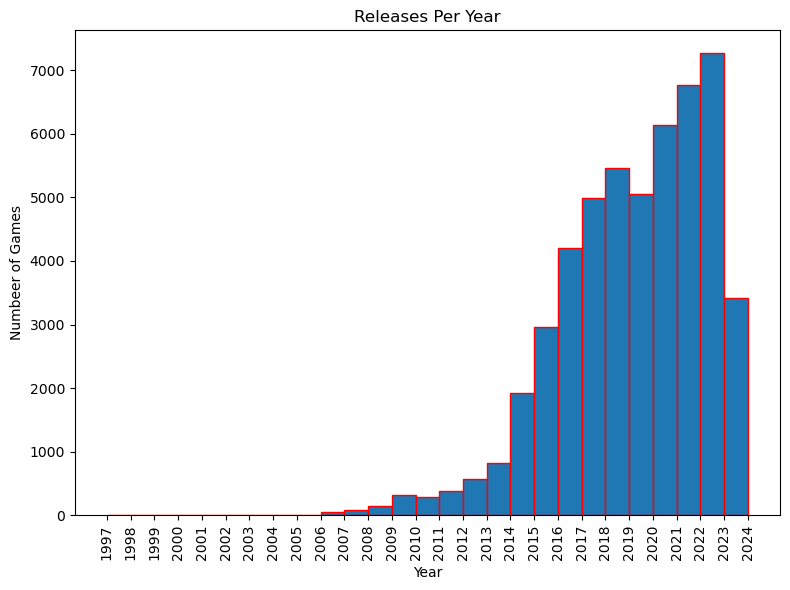

In [13]:
plt.figure(figsize=(8,6))
plt.title('Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Numbeer of Games')
plt.hist(x = games_df['release_year'], edgecolor = 'red',
         bins = range(min(games_df['release_year']), max(games_df['release_year']) + 2))
plt.xticks(range(min(games_df['release_year']), max(games_df['release_year']) + 2), rotation=90)
plt.tight_layout()

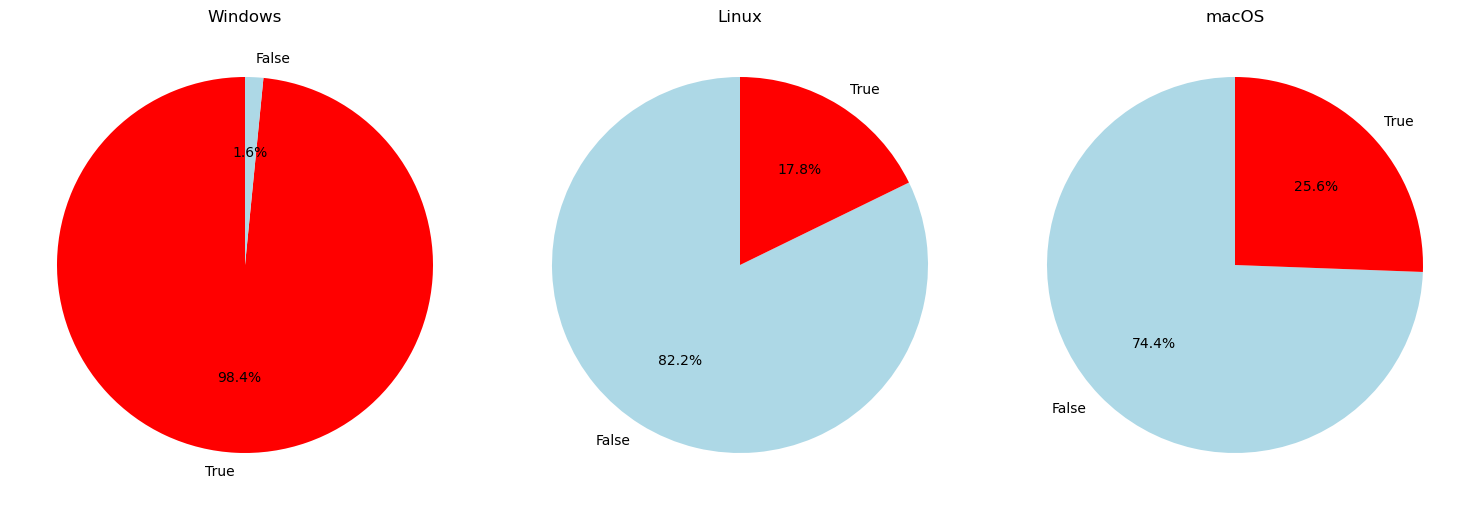

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# pie chart for Windows
axs[0].pie(games_df['win'].value_counts(), labels=games_df['win'].value_counts().index, 
           autopct='%1.1f%%', colors=['red', 'lightblue'],  startangle=90)
axs[0].set_title('Windows')

# pie chart for Linux
axs[1].pie(games_df['linux'].value_counts(), labels=games_df['linux'].value_counts().index, 
           autopct='%1.1f%%', colors=['lightblue', 'red'],  startangle=90)
axs[1].set_title('Linux')

# pie chart for macOS
axs[2].pie(games_df['mac'].value_counts(), labels=games_df['mac'].value_counts().index, 
           autopct='%1.1f%%', colors=['lightblue', 'red'],  startangle=90)
axs[2].set_title('macOS')

plt.tight_layout()

In [15]:
games_df['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [16]:
print("Number of Positively Rated Games (Rating > 70) :- ",(games_df[games_df['positive_ratio'] >= 70].shape[0] / games_df.shape[0]) * 100)
print("Number of Negatively Rated Games (Rating < 70) :- ",(games_df[games_df['positive_ratio'] < 70].shape[0] / games_df.shape[0]) * 100)

Number of Positively Rated Games (Rating > 70) :-  71.72707972951721
Number of Negatively Rated Games (Rating < 70) :-  28.272920270482782


In [17]:
print(min(games_df['price_final']))
print(max(games_df['price_final']))

price_bins = [0, 100, 200, float('inf')] 

price_labels = ['Low-priced', 'Medium-priced', 'High-priced']

# 'price_category' based on price bins
games_df['price_category'] = pd.cut(games_df['price_final'], bins=price_bins, labels=price_labels)

# Group by price category and calculate mean positive ratio and mean user reviews for each category
segmented_analysis = games_df.groupby('price_category').agg({
    'positive_ratio': 'mean',
    'user_reviews': 'mean'
})

print(segmented_analysis)

0.0
299.989990234375
                positive_ratio  user_reviews
price_category                              
Low-priced           77.222933   1672.699969
Medium-priced        77.840000     32.360000
High-priced          87.666667     69.666667


In [18]:
correlation_matrix = recommendation_df[['helpful', 'funny', 'is_recommended']].corr()

print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                 helpful    funny  is_recommended
helpful         1.000000  0.48036       -0.026876
funny           0.480360  1.00000       -0.003370
is_recommended -0.026876 -0.00337        1.000000


In [19]:
correlation = recommendation_df['hours'].corr(recommendation_df['is_recommended'])
print("Correlation between user activity and recommendation ratings:", correlation)

Correlation between user activity and recommendation ratings: 0.045541765155490285


is_recommended
True     9118637
False    1111350
Name: count, dtype: int64


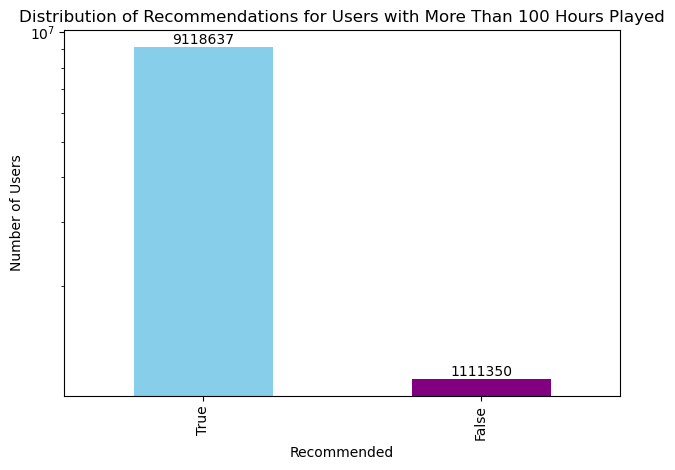

In [20]:
high_activity_users = recommendation_df[recommendation_df['hours'] > 100]

recommendation_counts = high_activity_users['is_recommended'].value_counts()
recommendation_counts.plot(kind='bar', color=['skyblue', 'purple'])

print(recommendation_counts)

for i, count in enumerate(recommendation_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')
plt.title('Distribution of Recommendations for Users with More Than 100 Hours Played')
plt.xlabel('Recommended')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.tight_layout()

In [21]:
merged_data = pd.merge(games_df , metadata_df , on = 'app_id' , how = 'inner')
merged_data.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'release_year', 'price_category',
       'description', 'tags'],
      dtype='object')

In [22]:
df = merged_data[['app_id', 'title','description', 'tags']]
df.head()

,app_id,title,description,tags
0,13500,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,,[Action]
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [23]:
df['tags'] = df['tags'].apply(lambda x:' '.join(x))
df['overview'] = df['title']+" "+df['description']+" "+df['tags']
df.head()

,app_id,title,description,tags,overview
0,13500,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,Action Adventure Parkour Third Person Great So...,Prince of Persia: Warrior Within™ Enter the da...
1,22364,BRINK: Agents of Change,,Action,BRINK: Agents of Change Action
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,Co-op Stealth Indie Heist Local Co-Op Strategy...,Monaco: What's Yours Is Mine Monaco: What's Yo...
3,226560,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,Zombies Adventure Survival Action Third Person...,Escape Dead Island Escape Dead Island is a Sur...
4,249050,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,Roguelike Strategy Tower Defense Pixel Graphic...,Dungeon of the ENDLESS™ Dungeon of the Endless...


In [24]:
final_df = df[['app_id','title','overview']]
final_df.head()

,app_id,title,overview
0,13500,Prince of Persia: Warrior Within™,Prince of Persia: Warrior Within™ Enter the da...
1,22364,BRINK: Agents of Change,BRINK: Agents of Change Action
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine Monaco: What's Yo...
3,226560,Escape Dead Island,Escape Dead Island Escape Dead Island is a Sur...
4,249050,Dungeon of the ENDLESS™,Dungeon of the ENDLESS™ Dungeon of the Endless...


In [25]:
import re

def remove_special_characters(s):
  return re.sub(r'[^\w\s]', '', s)

df['overview'] = df['overview'].apply(lambda x : remove_special_characters(x))

In [26]:
df['overview'] = df['overview'].apply(lambda x:x.lower())

In [27]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

df['overview'] = df['overview'].apply(stem)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500,stop_words='english')

cv.fit_transform(df['overview']).toarray().shape

(50872, 1500)

In [30]:
vectors = cv.fit_transform(df['overview']).toarray()

In [31]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine').fit(vectors)
distances, indices = nbrs.kneighbors(vectors)

In [32]:
def recommend(game):
    game_index = final_df[final_df['title'] == game].index[0]
    
    nearest_neighbors = indices[game_index][1:]
    for idx in nearest_neighbors:
        print(final_df.iloc[idx].title)

In [33]:
recommend('Escape Dead Island')

Dead Island Definitive Edition
Dead Island: Riptide Definitive Edition
Dead Rising 2: Off the Record
Dead Beacon


In [37]:
import random
random_game = random.choice(final_df['title'].tolist())

print("Recommendations for:-",random_game)
recommend(random_game)

Recommendations for:- AlCHeMoS
Tamarin
It Comes In Waves
Scars Above
World Annihilation Operations Parts I-IV
